# Hierarchical Clustering

## Setup

In [2]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Testing data

In [4]:
x, y, c = make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=0.80,
    random_state=1992,
    return_centers=True,
    n_features=2,
)

df_blobs = pl.DataFrame(
    {
        "x1": x[:, 0],
        "x2": x[:, 1],
        "y": y,
    }
)

df_centers = pl.DataFrame(
    {
        "x1": c[:, 0],
        "x2": c[:, 1],
    }
)

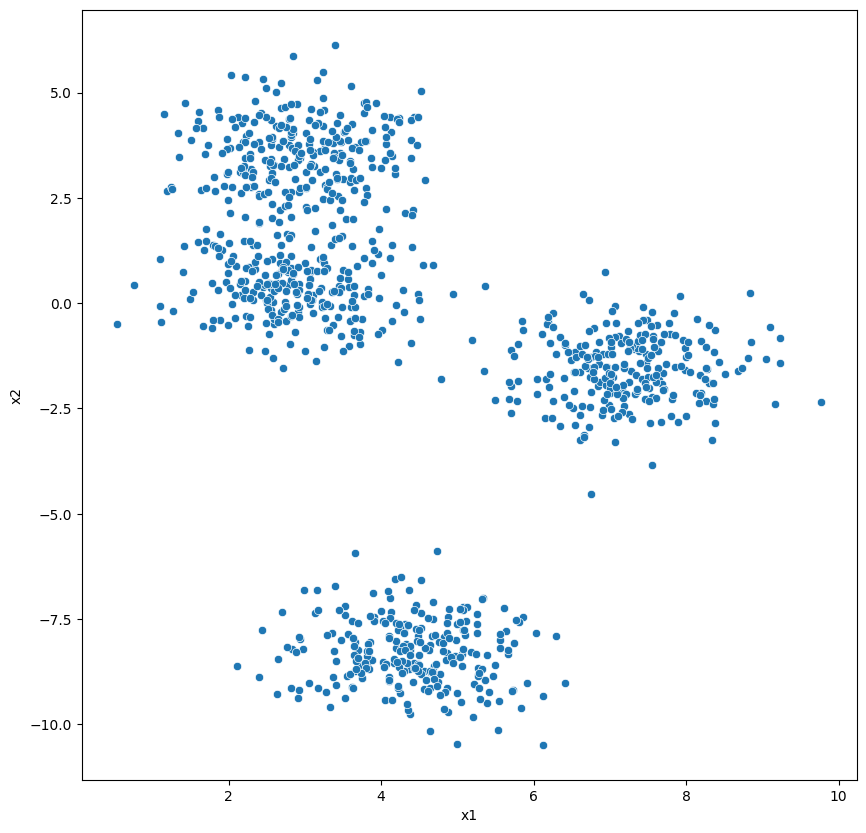

In [6]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_blobs, x="x1", y="x2")
plt.show()

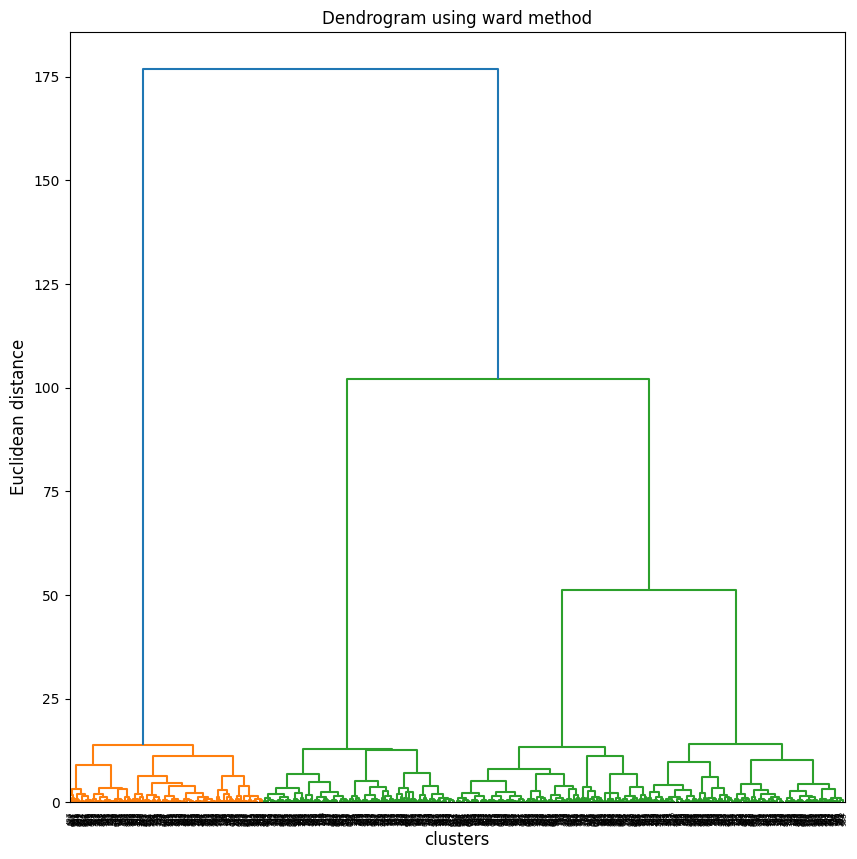

In [9]:
figure = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(x, method='ward'))
plt.title("Dendrogram using ward method")
plt.xlabel("clusters", fontsize=12)
plt.ylabel("Euclidean distance", fontsize=12)
plt.show()

In [11]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
y_hc = clustering.fit_predict(x)

In [16]:
df_blobs = df_blobs.with_columns(pl.Series(name="clusters", values=y_hc))

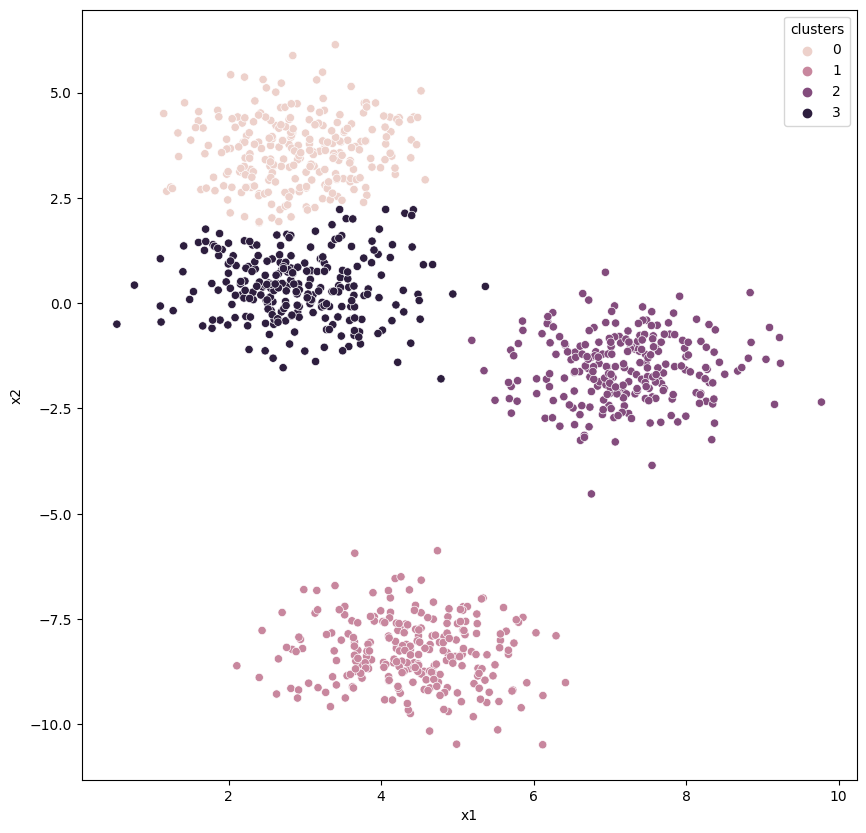

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="clusters")
plt.show()

## Evaluating the clustering results


In [19]:
s_score = silhouette_score(x, y_hc)
print(s_score)

0.6604670360277086


For n_clusters = 3 The average silhouette_score is : 0.6604670360277086
For n_clusters = 4 The average silhouette_score is : 0.6604670360277086
For n_clusters = 5 The average silhouette_score is : 0.6604670360277086
For n_clusters = 6 The average silhouette_score is : 0.6604670360277086


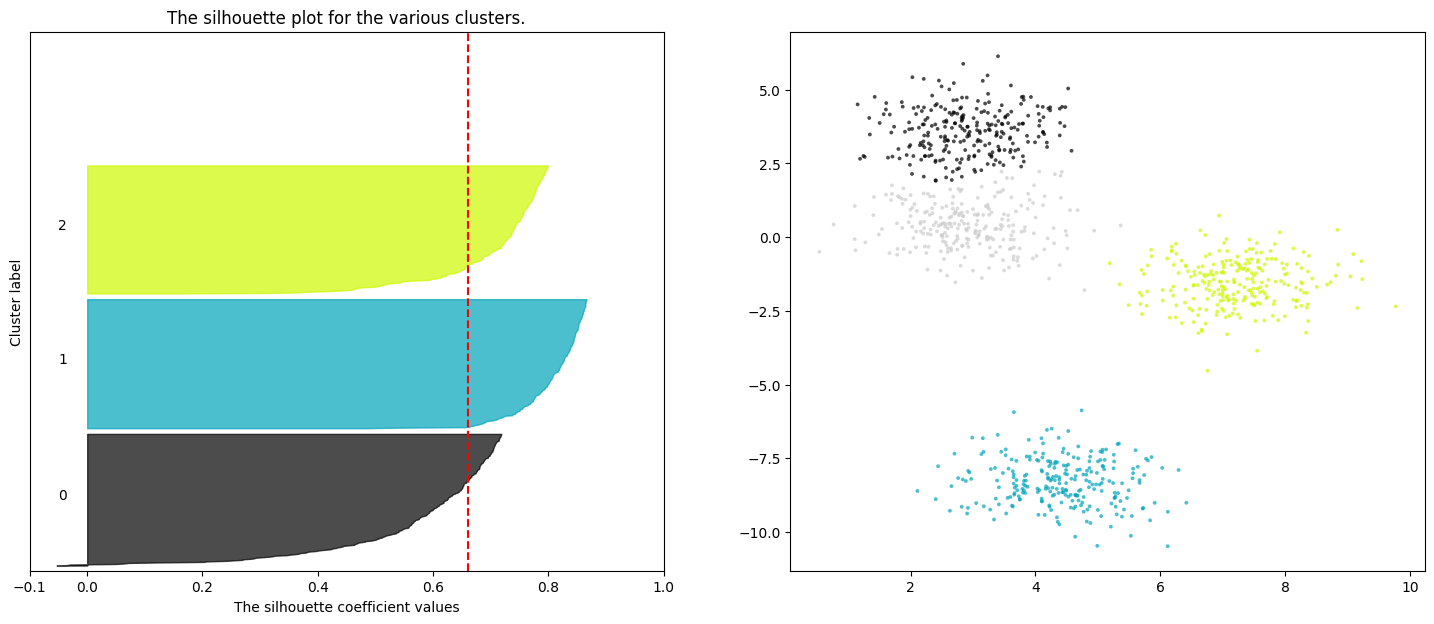

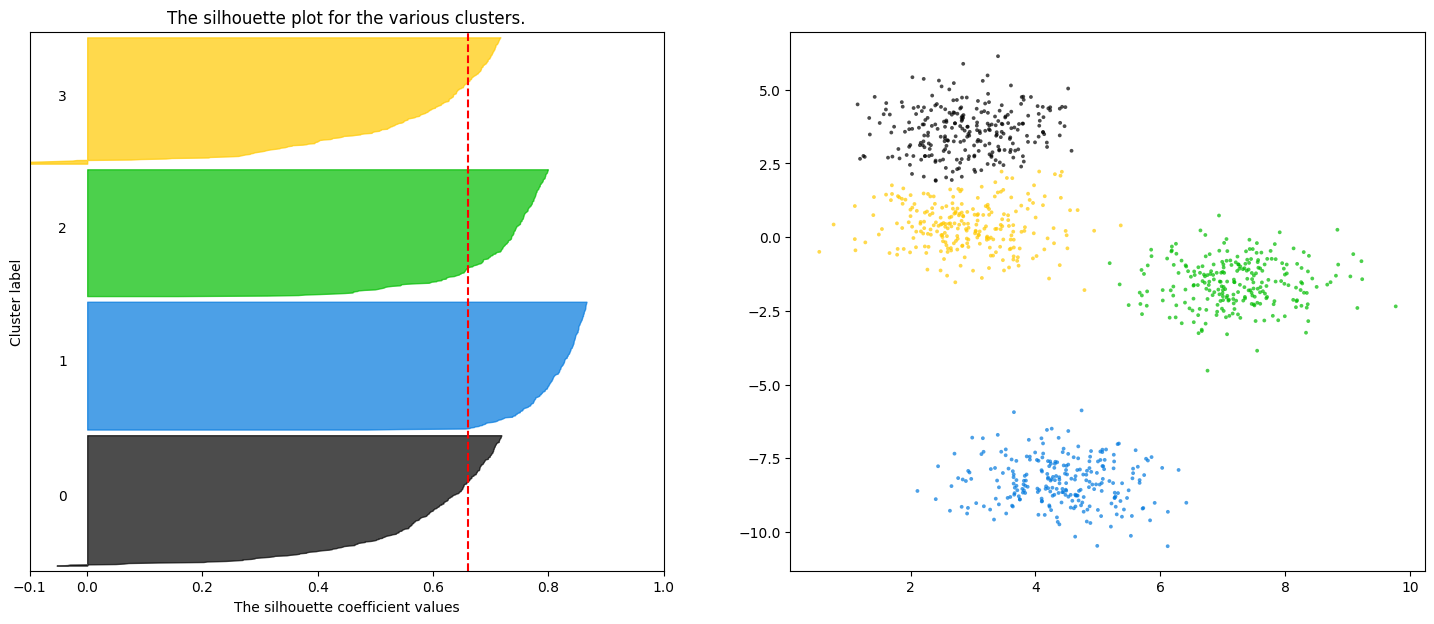

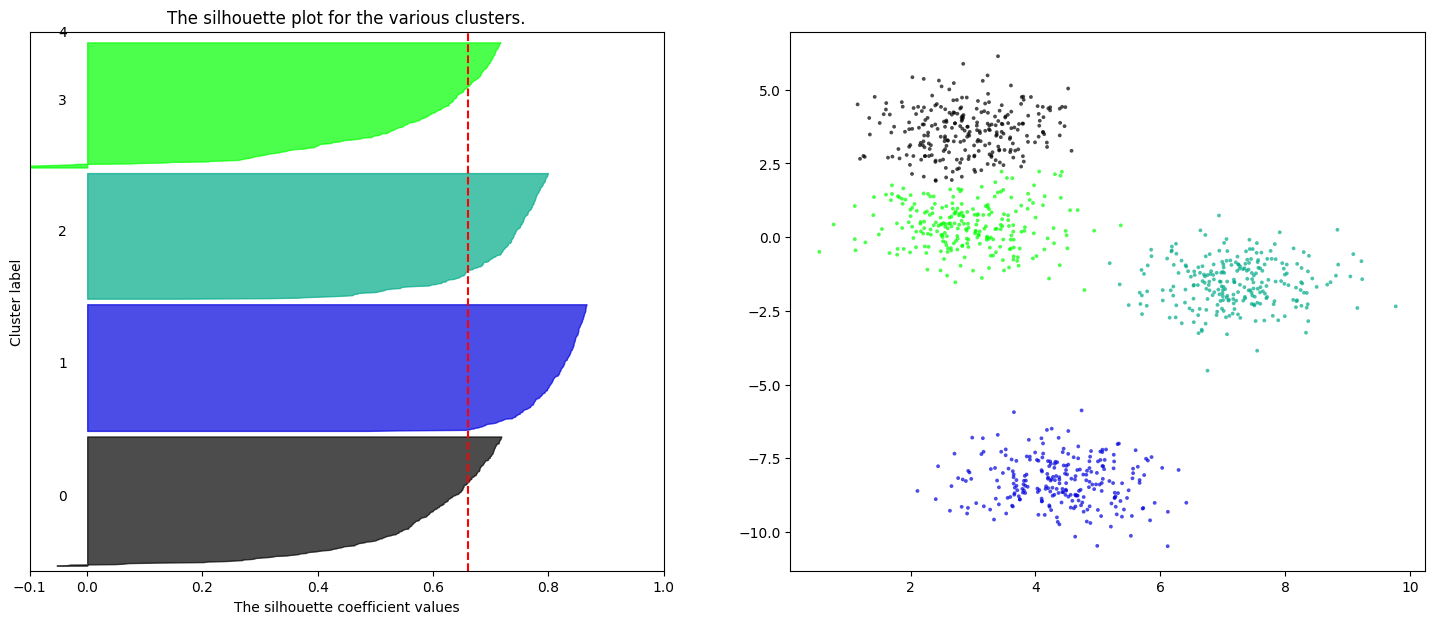

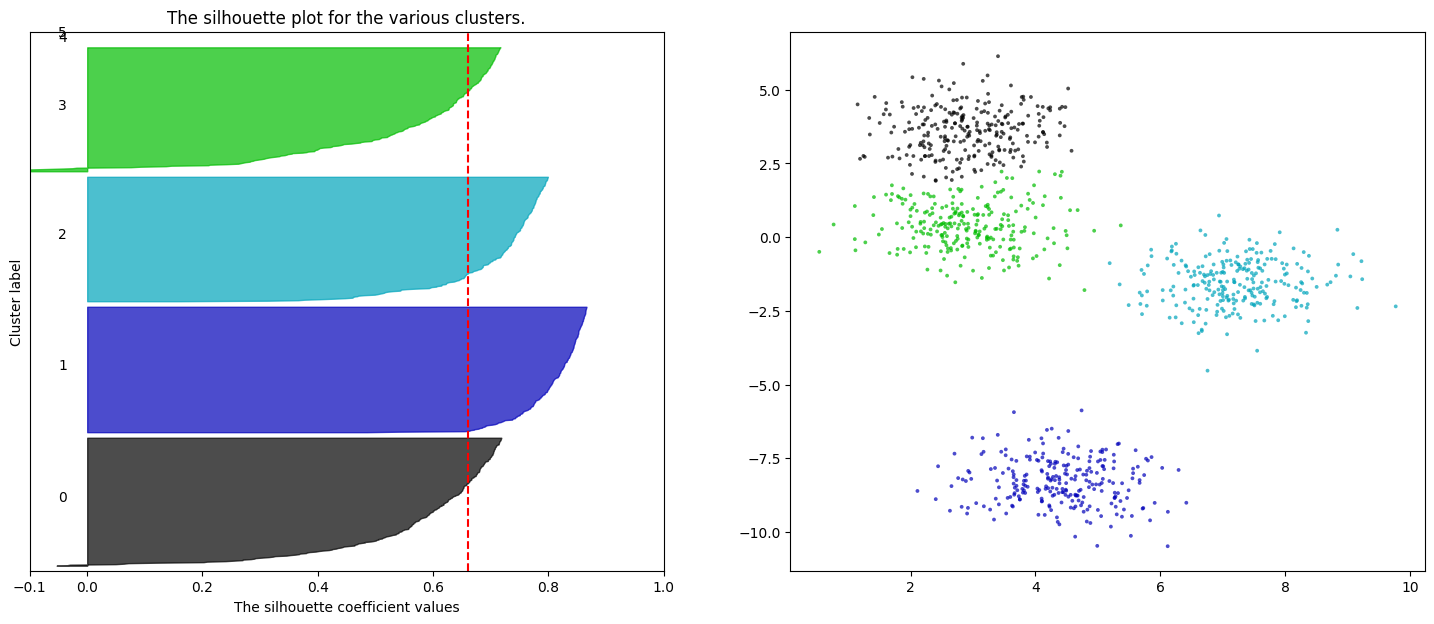

In [23]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="ward", metric="euclidean"
    )
    cluster_labels = clustering.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

plt.show()